In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
road = cv2.imread('/home/wanakin/DATA/road_image.jpg')

In [3]:
road_copy = np.copy(road)

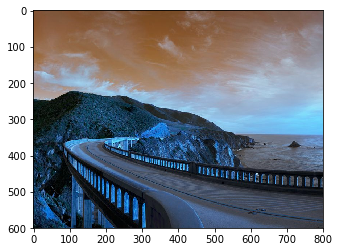

In [4]:
plt.imshow(road)

In [7]:
road.shape[:2]

(600, 800)

In [6]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [8]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [9]:
from matplotlib import cm

In [10]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
cm.tab10(0)[:3]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [40]:
def create_rgb (i):
    
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [41]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [39]:
 colors

[(31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0)]

In [28]:
# GLOBAL VARIABLES
current_marker = 1 # COLOR CHOICE
marks_updated = False #MARKERS UPDATED BY WATERSHED
n_markers = 10 #0-9

In [44]:
# CALLBACK FUNCTION

def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        #MARKERS PASSED TO THE WATERSHED ALGORITHM
            cv2.circle(marker_image,(x,y),10,(current_marker),-1)
            
            #USER SEES ON THE ROAD IMAGE
            cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
            marks_updated = True

In [43]:
#WHILE TRUE
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    cv2.imshow('Watershed Segments',segments)
    cv2.imshow('Road Image',road_copy)
    
    #EXIT
    k= cv2.waitKey(1)
    if k == 27:
        break
    #
    elif k == ord('c'): #CLEARING THE MARKERS
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        #UPDATE COLOR CHOICE
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
        #UPDATING THE MARKERS
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        # COLORING THE SEGMENTS
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
            
cv2.destroyAllWindows()

1
2
3
3
3
3
3
3
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
1
2
2
2
2
2
2
2
2
9
9
9
9
9
9
9
9
9
9
9
9
9
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
2
2
2
3
3
3
4
4
4
5
5
5
1
2
3
4
5
5
2
2
5
1
2
2
3
7
7
7
7
